In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.neighbors import KNeighborsRegressor
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
# from sklearn import metrics

In [5]:
# Reading the dataset

dataset = pd.read_csv('movie_metadata.csv')


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
# Loading dataset

dataset.head()


color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

      actor_1_name                                        movie_title  \
0      CCH Pounder                                            Avatar    
1      Johnny Depp          Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                           Spectre    
3        Tom Hardy                             The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143                   NaN   

   facenumber_in_poster                                      plot_keywords  \
0                   0.0             avatar|future|marine|native|paraplegic   
1                   0.0  goddess|marriage ceremony|marriage proposal|pi...   
2                   1.0                bomb|espionage|sequel|spy|terrorist   
3                   0.0  deception|imprisonment|lawlessness|police offi...   
4                   0.0                                                NaN   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                   NaN   

  language country content_rating       budget  title_year  \
0  English     USA          PG-13  237000000.0      2009.0   
1  English     USA          PG-13  300000000.0      2007.0   
2  English      UK          PG-13  245000000.0      2015.0   
3  English     USA          PG-13  250000000.0      2012.0   
4      NaN     NaN            NaN          NaN         NaN   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0  
2                   393.0         6.8          2.35                 85000  
3                 23000.0         8.5          2.35                164000  
4                    12.0         7.1           NaN                     0

In [8]:

dataset.shape


(5043, 28)

In [9]:
# Checking the information of dataset

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [10]:
# There are null values present in this dataset which have to be imputed.

dataset.isnull().sum()


color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [11]:
# Displying columns

dataset.columns


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [12]:
# Checking how many movies are in color or black and white

dataset['color'].value_counts()


color
Color               4815
 Black and White     209
Name: count, dtype: int64

In [13]:
# Check the min, max values as well as mean and standard deviation.

dataset.describe()


num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

In [14]:
# Displaying the number of variables present in the data frames...

dataset.nunique()


color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       46
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [15]:
# Checking movie languages.

dataset['language'].value_counts()


language
English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Italian         11
Russian         11
Korean           8
Portuguese       8
Danish           5
Swedish          5
Hebrew           5
Arabic           5
Polish           4
Persian          4
Norwegian        4
Dutch            4
Chinese          3
Thai             3
Indonesian       2
Romanian         2
Zulu             2
Dari             2
Icelandic        2
Aboriginal       2
Filipino         1
Maya             1
Kazakh           1
Telugu           1
Aramaic          1
Mongolian        1
Bosnian          1
Hungarian        1
Kannada          1
Czech            1
Dzongkha         1
Tamil            1
Panjabi          1
Vietnamese       1
Urdu             1
Slovenian        1
Greek            1
Swahili          1
Name: count, dtype: int64

In [16]:
# Movie names.

dataset['movie_title']


0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [17]:
# French movies

dataset.movie_title[dataset.language == 'French']


242     Asterix at the Olympic Games 
489                        Evolution 
504                           Oceans 
889           A Very Long Engagement 
1133        The Returned             
                    ...              
4829             When the Cat's Away 
4835                  Pierrot le Fou 
4911    The Case of the Grinning Cat 
4952                Une Femme Mariée 
5026                           Clean 
Name: movie_title, Length: 73, dtype: object

In [18]:
# Saving the French movies into a separate dataframe

french_collection=dataset[dataset.language == 'French']


In [19]:
french_collection.head()

color          director_name  num_critic_for_reviews  duration  \
242   Color     Frédéric Forestier                    33.0     116.0   
489   Color  Lucile Hadzihalilovic                    63.0      81.0   
504   Color         Jacques Perrin                   113.0     104.0   
889   Color     Jean-Pierre Jeunet                   186.0     133.0   
1133  Color                    NaN                    23.0      52.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
242                       0.0                   141.0   Santiago Segura   
489                      92.0                     8.0      Roxane Duran   
504                      63.0                     7.0    Jacques Perrin   
889                       0.0                    46.0  André Dussollier   
1133                      NaN                   114.0    Clotilde Hesme   

      actor_1_facebook_likes       gross                           genres  \
242                    936.0         NaN  Adventure|Comedy|Family|Fantasy   
489                     23.0         NaN      Drama|Horror|Mystery|Sci-Fi   
504                     67.0  19406406.0                Documentary|Drama   
889                    226.0   6167817.0        Drama|Mystery|Romance|War   
1133                   164.0         NaN     Drama|Fantasy|Horror|Mystery   

              actor_1_name                    movie_title  num_voted_users  \
242            Alain Delon  Asterix at the Olympic Games             20567   
489          Nissim Renard                     Evolution               979   
504   Pedro Armendáriz Jr.                        Oceans              7630   
889           Denis Lavant        A Very Long Engagement             62607   
1133        Pierre Perrier      The Returned                         15762   

      cast_total_facebook_likes            actor_3_name  facenumber_in_poster  \
242                        1609         Vanessa Hessler                   1.0   
489                          54  Julie-Marie Parmentier                   0.0   
504                         152            Rie Miyazawa                   0.0   
889                         405         Albert Dupontel                   1.0   
1133                        654         Céline Sallette                   9.0   

                                          plot_keywords  \
242   1st century b.c.|lightsaber|local blockbuster|...   
489          boy|giving birth|nurse|sea|ultrasonography   
504   damselfish|ocean habitat|ocean life|razorfish|...   
889      court martial|death|girl|no man's land|soldier   
1133  france|living dead|serial killer|small town|su...   

                                        movie_imdb_link  num_user_for_reviews  \
242   http://www.imdb.com/title/tt0463872/?ref_=fn_t...                  36.0   
489   http://www.imdb.com/title/tt4291590/?ref_=fn_t...                   3.0   
504   http://www.imdb.com/title/tt0765128/?ref_=fn_t...                  42.0   
889   http://www.imdb.com/title/tt0344510/?ref_=fn_t...                 239.0   
1133  http://www.imdb.com/title/tt2521668/?ref_=fn_t...                  47.0   

     language country content_rating      budget  title_year  \
242    French  France            NaN  78000000.0      2008.0   
489    French  France            NaN         NaN      2015.0   
504    French  France              G  40000000.0      2009.0   
889    French  France              R  47000000.0      2004.0   
1133   French  France          TV-MA         NaN         NaN   

      actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
242                    276.0         5.1          2.35                   291  
489                     21.0         6.4          2.35                   257  
504                     63.0         7.8          2.35                     0  
889                     52.0         7.7          2.35                     0  
1133                   116.0         8.3         16.00                 17000

In [20]:
# storing movies with imdb scores above or equal to 7 

scores = french_collection.imdb_score[french_collection.imdb_score >= 7]


In [21]:
# storing movie_titles with imdb scores above or equal to 7

name=french_collection.movie_title[french_collection.imdb_score >= 7]

In [22]:
#  storing movie genre with imdb scores above or equal to 7

genre=french_collection.genres[french_collection.imdb_score >= 7]


In [23]:
# creating a dataframe with all values concatenated into one dataframe

french_collection_ratings = pd.concat([name,genre,scores],axis=1)

In [24]:
french_collection_ratings

movie_title  \
504                                     Oceans    
889                     A Very Long Engagement    
1133                  The Returned                
1176                                   Micmacs    
1298                                    Amélie    
1505                  The Horseman on the Roof    
1724                           Little Nicholas    
2007                         Little White Lies    
2119                               Joyeux Noel    
2125                                   Molière    
2586                     Welcome to the Sticks    
2735                              District B13    
2758                               Sarah's Key    
2802         The Diving Bell and the Butterfly    
2876                          Paris, je t'aime    
2879                 The Widow of Saint-Pierre    
2919                        Ernest & Celestine    
3088                         La Famille Bélier    
3178                            The Red Violin    
3264                                     Amour    
3327                                   Polisse    
3400                                   8 Women    
3425  The Rocket: The Legend of Rocket Richard    
3437                              Far from Men    
3456                                Persepolis    
3522                             Les visiteurs    
3550                                 Incendies    
3652                       L'auberge espagnole    
3677                                The Chorus    
3682                                  Le Havre    
3683                              Irreversible    
3759                   The Barbarian Invasions    
3772                           Of Gods and Men    
3837                         The Names of Love    
3937                               Holy Motors    
4024                     March of the Penguins    
4039                                 The Class    
4263                The Triplets of Belleville    
4398                       Mississippi Mermaid    
4714           They Will Have to Kill Us First    
4717                             Irreplaceable    
4835                            Pierrot le Fou    
4911              The Case of the Grinning Cat    
4952                          Une Femme Mariée    

                                   genres  imdb_score  
504                     Documentary|Drama         7.8  
889             Drama|Mystery|Romance|War         7.7  
1133         Drama|Fantasy|Horror|Mystery         8.3  
1176                  Action|Comedy|Crime         7.2  
1298                       Comedy|Romance         8.4  
1505          Adventure|Drama|Romance|War         7.1  
1724                        Comedy|Family         7.2  
2007                         Comedy|Drama         7.1  
2119      Drama|History|Music|Romance|War         7.8  
2125                       Comedy|History         7.3  
2586                       Comedy|Romance         7.1  
2735                Action|Crime|Thriller         7.2  
2758                            Drama|War         7.5  
2802                      Biography|Drama         8.0  
2876                 Comedy|Drama|Romance         7.3  
2879                        Drama|Romance         7.3  
2919  Animation|Comedy|Crime|Drama|Family         7.9  
3088                   Comedy|Drama|Music         7.4  
3178          Drama|Music|Mystery|Romance         7.7  
3264                        Drama|Romance         7.9  
3327                          Crime|Drama         7.3  
3400         Comedy|Crime|Musical|Romance         7.1  
3425                Biography|Drama|Sport         7.7  
3437                    Drama|War|Western         7.3  
3456        Animation|Biography|Drama|War         8.0  
3522                Comedy|Fantasy|Sci-Fi         7.0  
3550                    Drama|Mystery|War         8.2  
3652                         Comedy|Drama         7.3  
3677                          Drama|Music         7.9  
3682                         Comedy|Drama         7.2  
3683

In [25]:
french_collection_ratings['genres'].value_counts()

genres
Comedy|Drama                           4
Drama                                  3
Documentary                            3
Comedy|Drama|Romance                   2
Comedy|Romance                         2
Drama|Romance                          2
Crime|Drama|Romance                    2
Documentary|Drama                      1
Action|Comedy|Crime                    1
Drama|History|Music|Romance|War        1
Comedy|Family                          1
Comedy|History                         1
Action|Crime|Thriller                  1
Biography|Drama                        1
Adventure|Drama|Romance|War            1
Drama|Fantasy|Horror|Mystery           1
Drama|Mystery|Romance|War              1
Comedy|Drama|Music                     1
Animation|Comedy|Crime|Drama|Family    1
Drama|War                              1
Drama|Music|Mystery|Romance            1
Drama|War|Western                      1
Crime|Drama                            1
Comedy|Crime|Musical|Romance           1
Biography

**Data visualization**

In [26]:
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

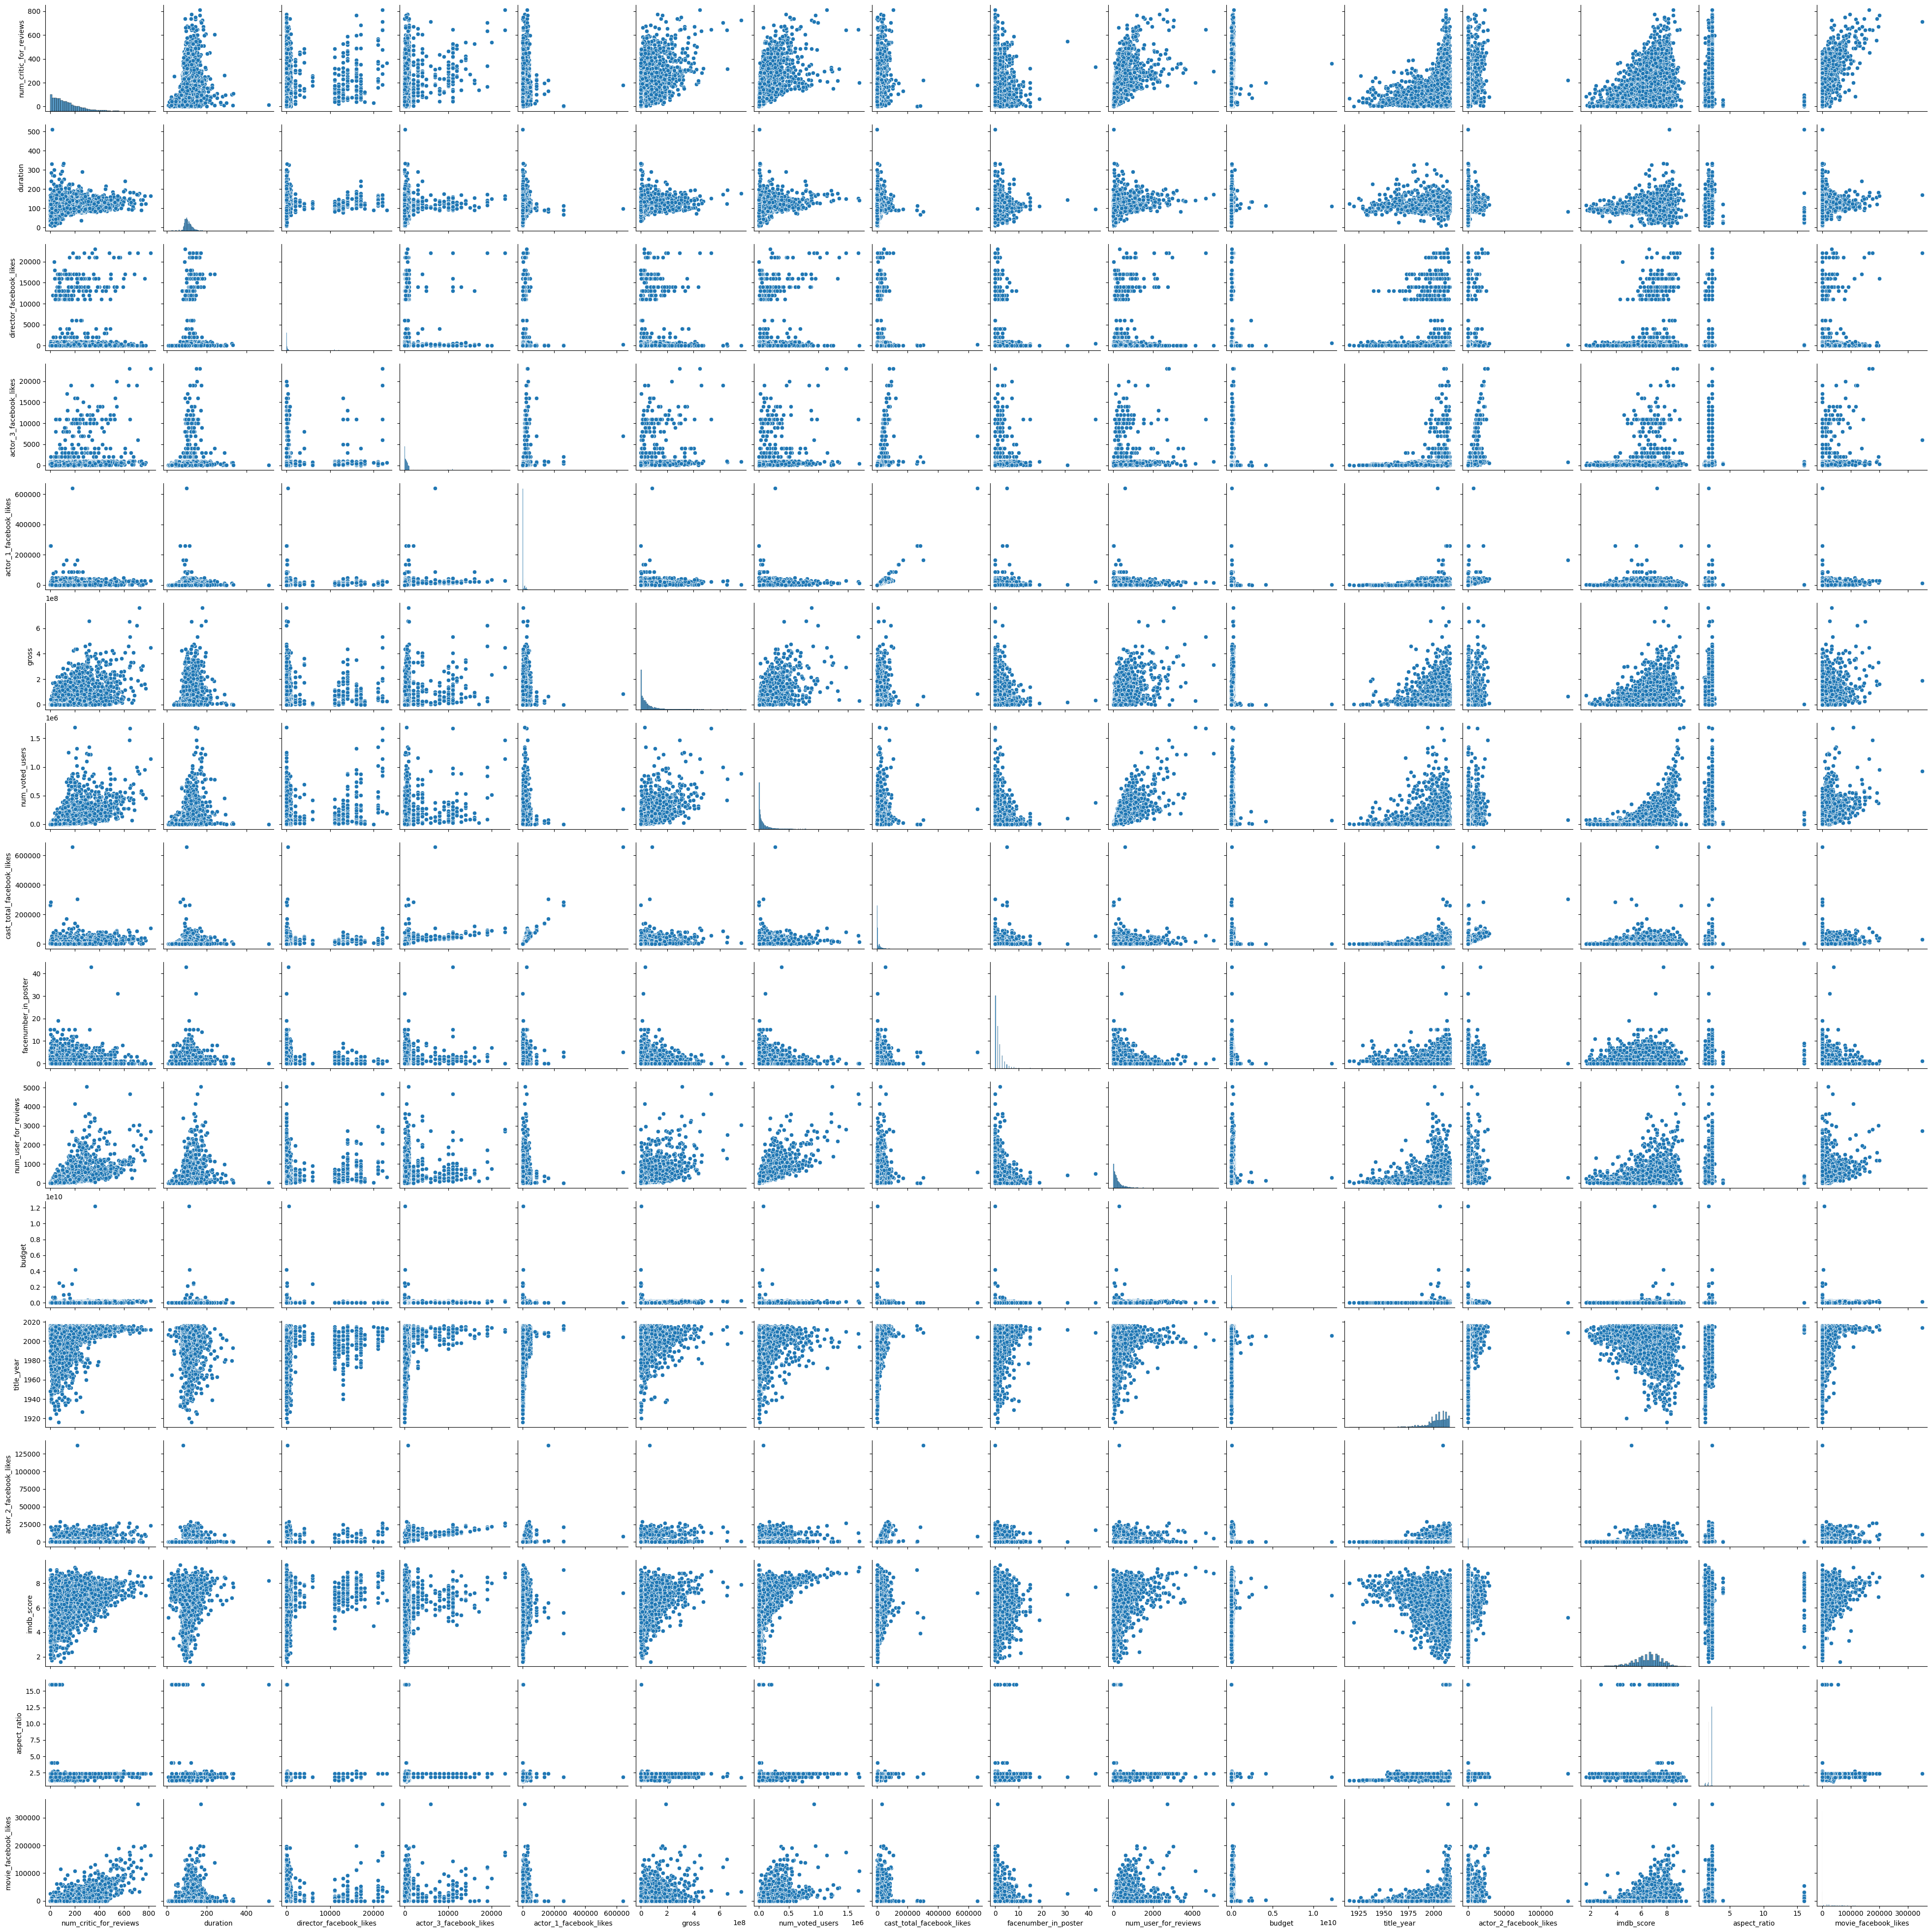

In [27]:
sns.pairplot(data = dataset)

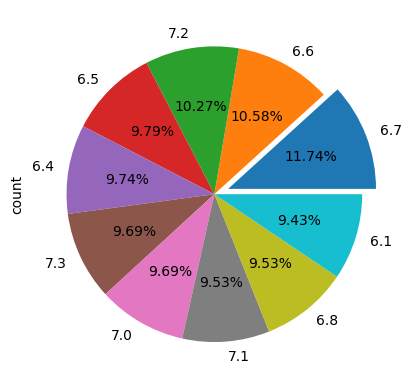

In [29]:
import matplotlib.pyplot as plt

# Define explode
explode = (.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Plot the pie chart
dataset['imdb_score'].value_counts(ascending=False).head(10).plot(kind='pie',autopct="%0.2f%%",explode=explode)

# Show the plot
plt.show()


<Axes: xlabel='imdb_score', ylabel='Density'>

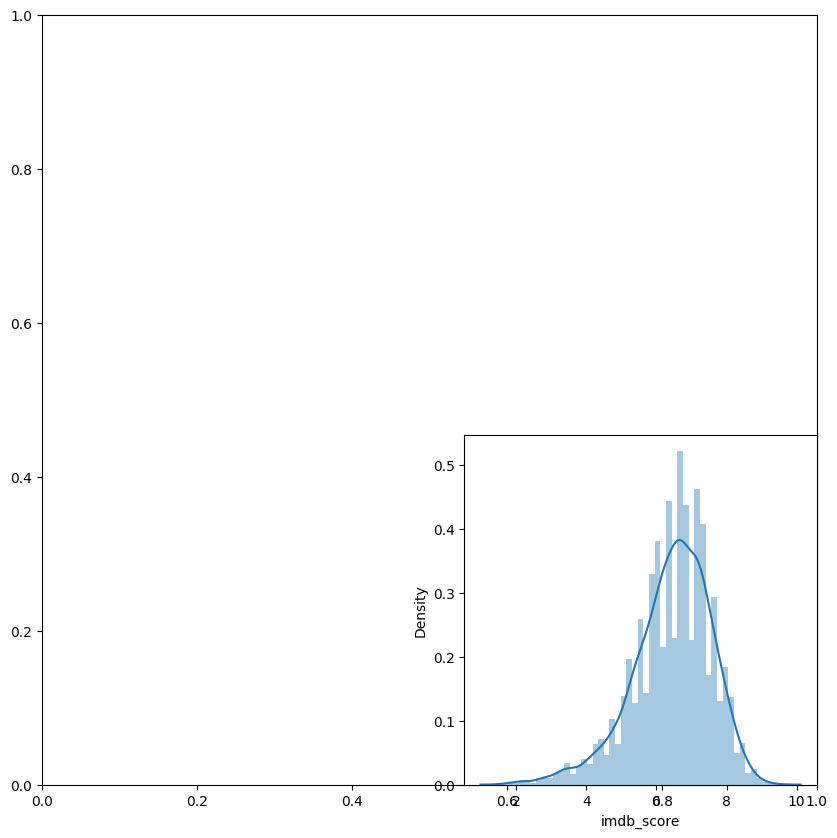

In [30]:
# Distribution plot for all prices.
f,ax=plt.subplots(figsize=(10,10))
ax3=plt.subplot(224)
sns.distplot(dataset['imdb_score'],ax=ax3)
# Using the distribution plot we can see that the imdb score is the highest at a imdb score which is between 6 and 8

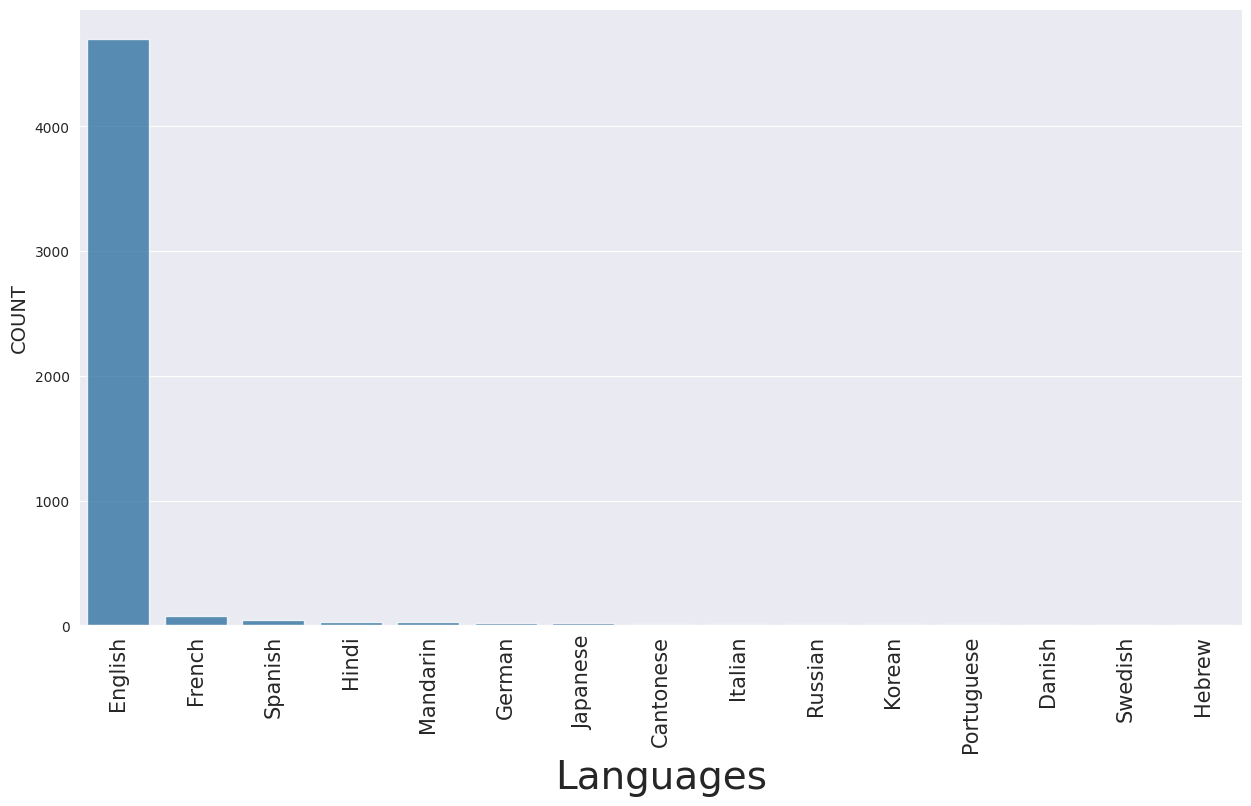

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
 

top_languages = dataset['language'].value_counts().head(15).sort_values(ascending=False)
plt.figure(figsize=(15, 8))
graph = sns.barplot( top_languages.values, alpha=0.8)
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('Languages', fontsize=28)
graph.set_xticklabels(rotation=90, labels=top_languages.index, fontsize=15)

plt.show()


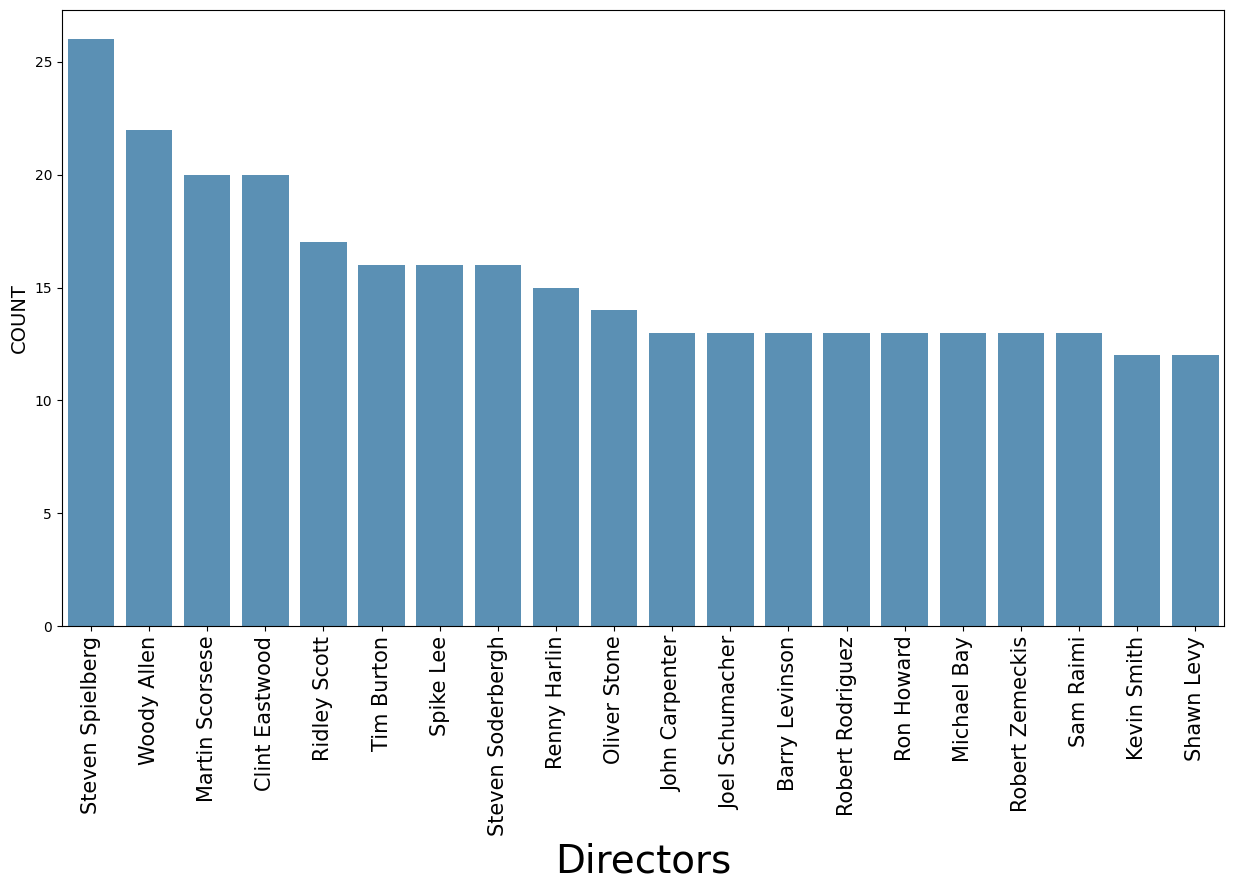

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('movie_metadata.csv')


# extract the top 20 director names
directors = dataset['director_name'].value_counts().head(20).sort_values(ascending=False)

# create bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x=directors.index, y=directors.values, alpha=0.8)
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('Directors', fontsize=28)
plt.xticks(rotation=90, fontsize=15)

plt.show()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64],
 [Text(0, 0, 'USA'),
  Text(1, 0, 'UK'),
  Text(2, 0, 'New Zealand'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'Belgium'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'China'),
  Text(9, 0, 'France'),
  Text(10, 0, 'New Line'),
  Text(11, 0, 'Mexico'),
  Text(12, 0, 'Spain'),
  Text(13, 0, 'Hong Kong'),
  Text(14, 0, 'Czech Republic'),
  Text(15, 0, 'India'),
  Text(16, 0, 'Soviet Union'),
  Text(17, 0, 'South Korea'),
  Text(18, 0, 'Peru'),
  Text(19, 0, 'Italy'),
  Text(20, 0, 'Russia'),
  Text(21, 0, 'Aruba'),
  Text(22, 0, 'Denmark'),
  Text(23, 0, 'Libya'),
  Text(24,

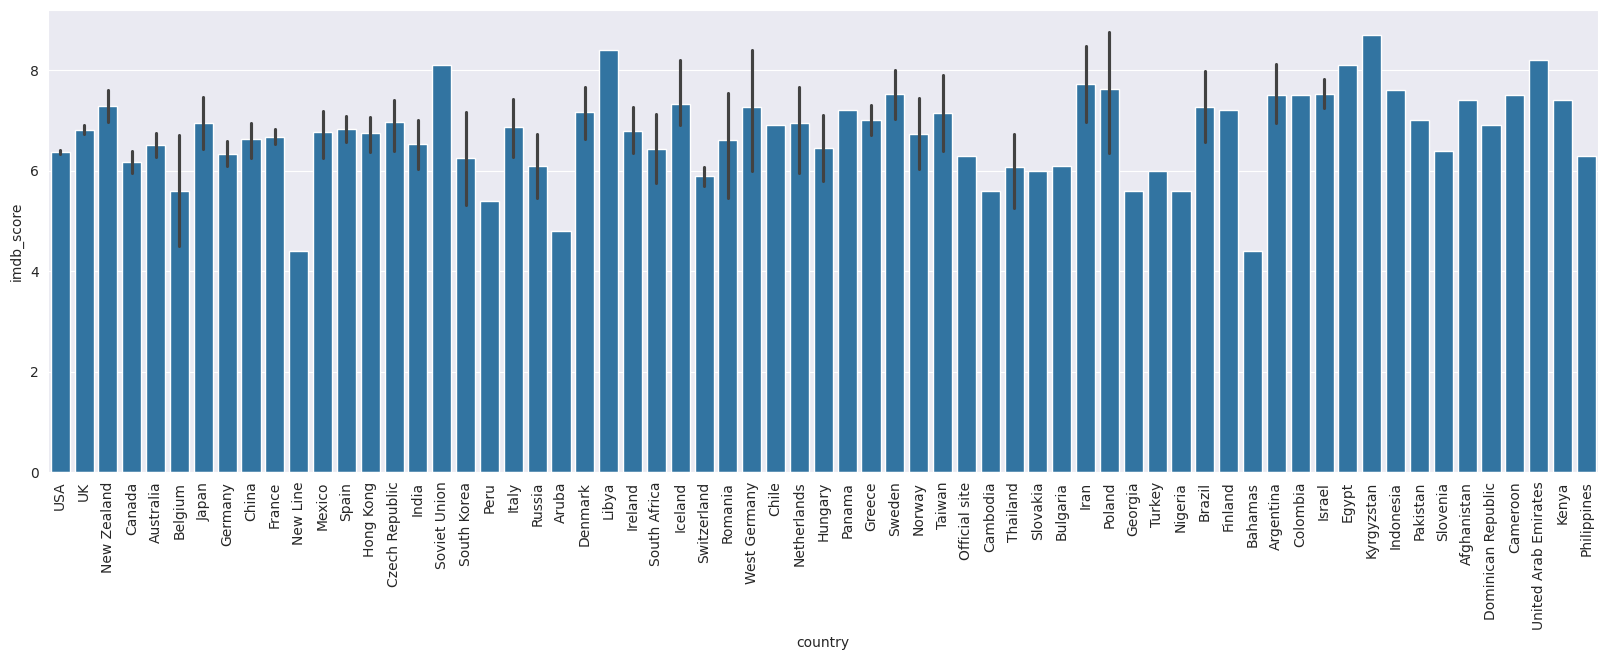

In [96]:
# Visualizing the barplot of countries and the imdb scores.

plt.figure(figsize=(20, 6))
sns.barplot(x='country',y='imdb_score',data=dataset);
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'G'),
  Text(3, 0, 'R'),
  Text(4, 0, 'TV-14'),
  Text(5, 0, 'TV-PG'),
  Text(6, 0, 'TV-MA'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, 'Not Rated'),
  Text(9, 0, 'Unrated'),
  Text(10, 0, 'Approved'),
  Text(11, 0, 'TV-Y'),
  Text(12, 0, 'NC-17'),
  Text(13, 0, 'X'),
  Text(14, 0, 'TV-Y7'),
  Text(15, 0, 'GP'),
  Text(16, 0, 'Passed'),
  Text(17, 0, 'M')])

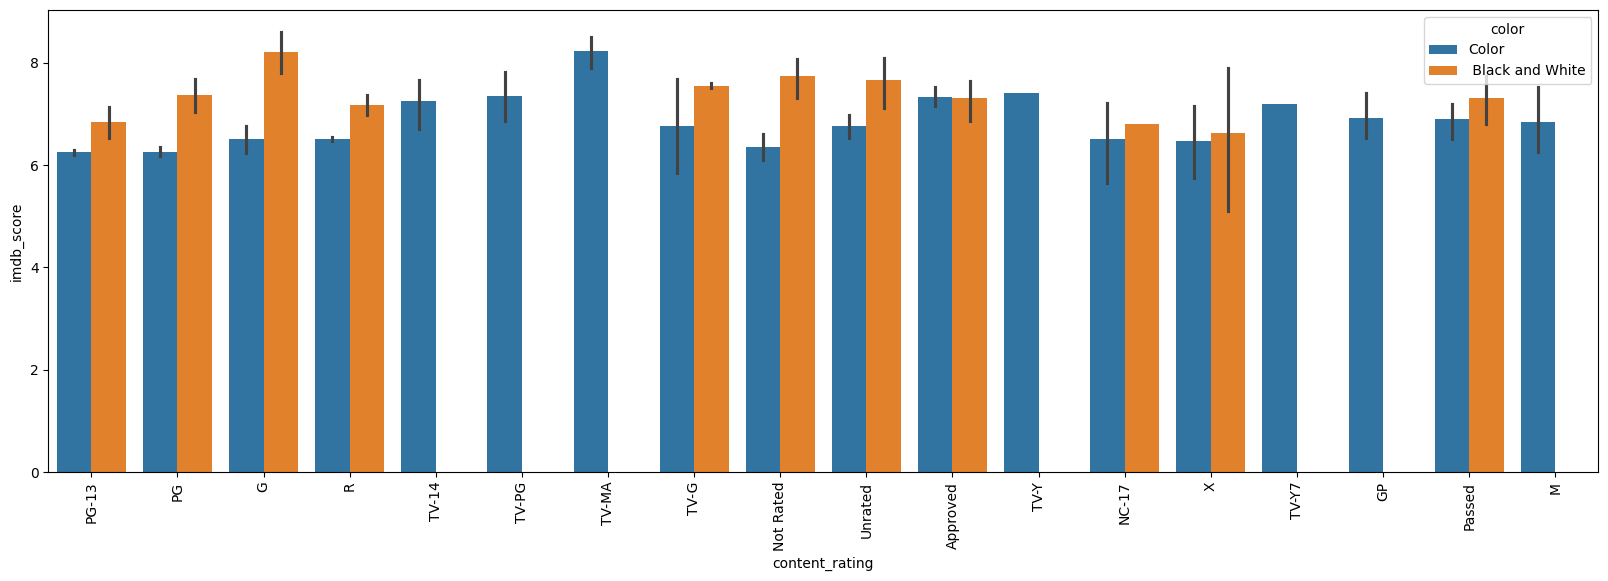

In [32]:
# This visualization shows the type of content having higher imdbscore and shows us the type of movie color present in data

plt.figure(figsize=(20, 6))
sns.barplot(x='content_rating',y='imdb_score',hue='color',data=dataset);
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'G'),
  Text(3, 0, 'R'),
  Text(4, 0, 'TV-14'),
  Text(5, 0, 'TV-PG'),
  Text(6, 0, 'TV-MA'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, 'Not Rated'),
  Text(9, 0, 'Unrated'),
  Text(10, 0, 'Approved'),
  Text(11, 0, 'TV-Y'),
  Text(12, 0, 'NC-17'),
  Text(13, 0, 'X'),
  Text(14, 0, 'TV-Y7'),
  Text(15, 0, 'GP'),
  Text(16, 0, 'Passed'),
  Text(17, 0, 'M')])

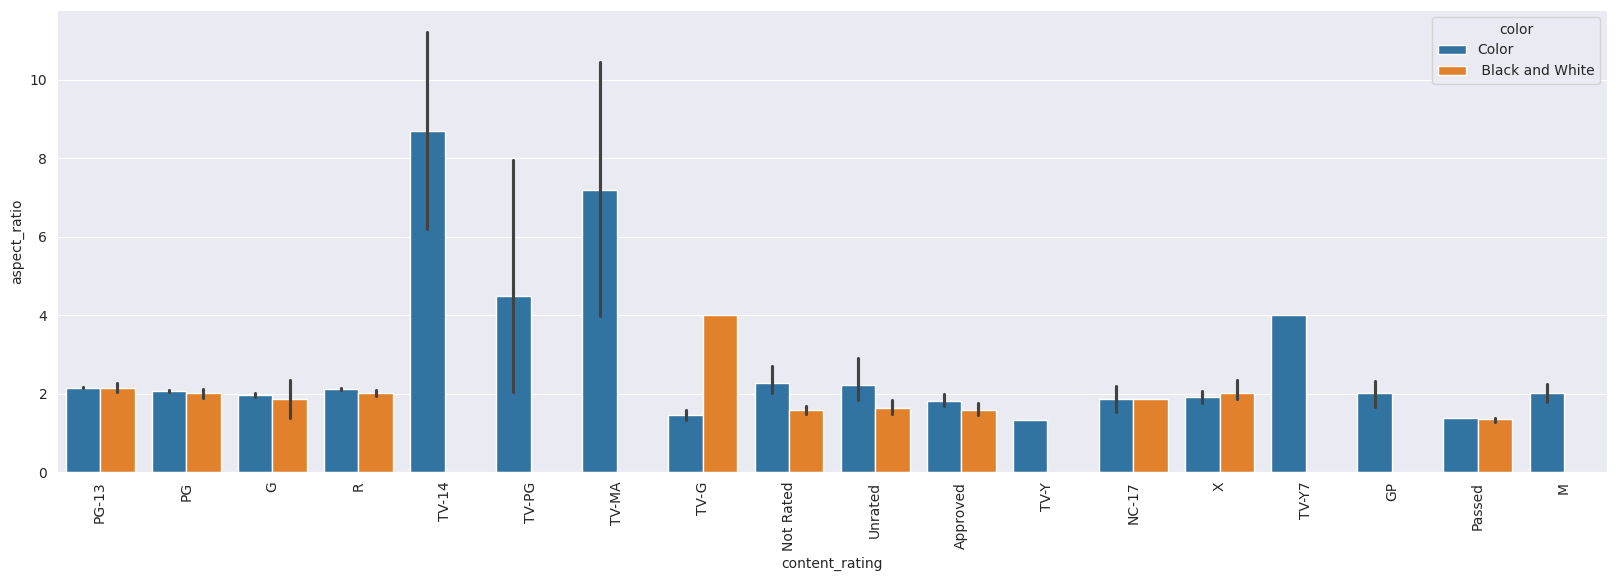

In [101]:
# This visualization shows the type of content rating on X-axis having aspect ratio on Y-axis and hue with type of movie color.

plt.figure(figsize=(20, 6))
sns.barplot(x='content_rating',y='aspect_ratio',hue='color',data=dataset);
plt.xticks(rotation=90)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, '1.18'),
  Text(1, 0, '1.2'),
  Text(2, 0, '1.33'),
  Text(3, 0, '1.37'),
  Text(4, 0, '1.44'),
  Text(5, 0, '1.5'),
  Text(6, 0, '1.66'),
  Text(7, 0, '1.75'),
  Text(8, 0, '1.77'),
  Text(9, 0, '1.78'),
  Text(10, 0, '1.85'),
  Text(11, 0, '1.89'),
  Text(12, 0, '2.0'),
  Text(13, 0, '2.2'),
  Text(14, 0, '2.24'),
  Text(15, 0, '2.35'),
  Text(16, 0, '2.39'),
  Text(17, 0, '2.4'),
  Text(18, 0, '2.55'),
  Text(19, 0, '2.76'),
  Text(20, 0, '4.0'),
  Text(21, 0, '16.0')])

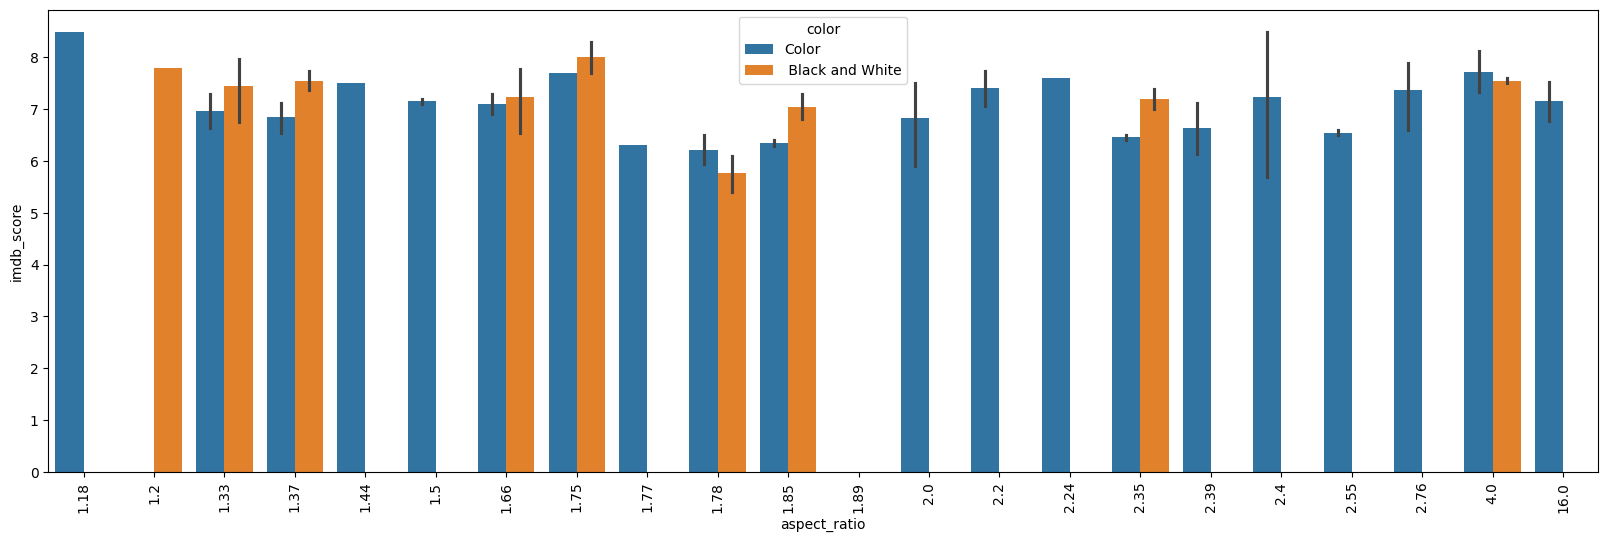

In [33]:
# This visualization shows the aspect ratio and its imdb score with hue as the color column.

plt.figure(figsize=(20, 6))
sns.barplot(x='aspect_ratio',y='imdb_score',hue='color',data=dataset);
plt.xticks(rotation=90)


In [34]:
# Removing null values 

dataset=dataset.dropna()

In [35]:
dataset.isnull().sum()


color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [36]:
dataset.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [37]:
dataset=dataset.drop(columns=['movie_imdb_link','color','movie_title','facenumber_in_poster', 'plot_keywords',
                    'actor_3_name','movie_imdb_link','aspect_ratio','language'])

In [38]:
dataset.head()

director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
5     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
5                   640.0   73058679.0          Action|Adventure|Sci-Fi   

      actor_1_name  num_voted_users  cast_total_facebook_likes  \
0      CCH Pounder           886204                       4834   
1      Johnny Depp           471220                      48350   
2  Christoph Waltz           275868                      11700   
3        Tom Hardy          1144337                     106759   
5     Daryl Sabara           212204                       1873   

   num_user_for_reviews country content_rating       budget  title_year  \
0                3054.0     USA          PG-13  237000000.0      2009.0   
1                1238.0     USA          PG-13  300000000.0      2007.0   
2                 994.0      UK          PG-13  245000000.0      2015.0   
3                2701.0     USA          PG-13  250000000.0      2012.0   
5                 738.0     USA          PG-13  263700000.0      2012.0   

   actor_2_facebook_likes  imdb_score  movie_facebook_likes  
0                   936.0         7.9                 33000  
1                  5000.0         7.1                     0  
2                   393.0         6.8                 85000  
3                 23000.0         8.5                164000  
5                   632.0         6.6                 24000

In [39]:
dataset.shape

(3755, 20)

**Label Encoding Categorical data**

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
# We have label encoded the categorical columns in the dataset and transformed them to numeric values.

categories_columns = ['content_rating','director_name','genres','actor_1_name','actor_2_name','country']
le=LabelEncoder()
for category in categories_columns:
    dataset[category] = le.fit_transform(dataset[category])


In [42]:
dataset.dtypes

director_name                  int64
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                   int64
actor_1_facebook_likes       float64
gross                        float64
genres                         int64
actor_1_name                   int64
num_voted_users                int64
cast_total_facebook_likes      int64
num_user_for_reviews         float64
country                        int64
content_rating                 int64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
dtype: object

**Distribution Plot**

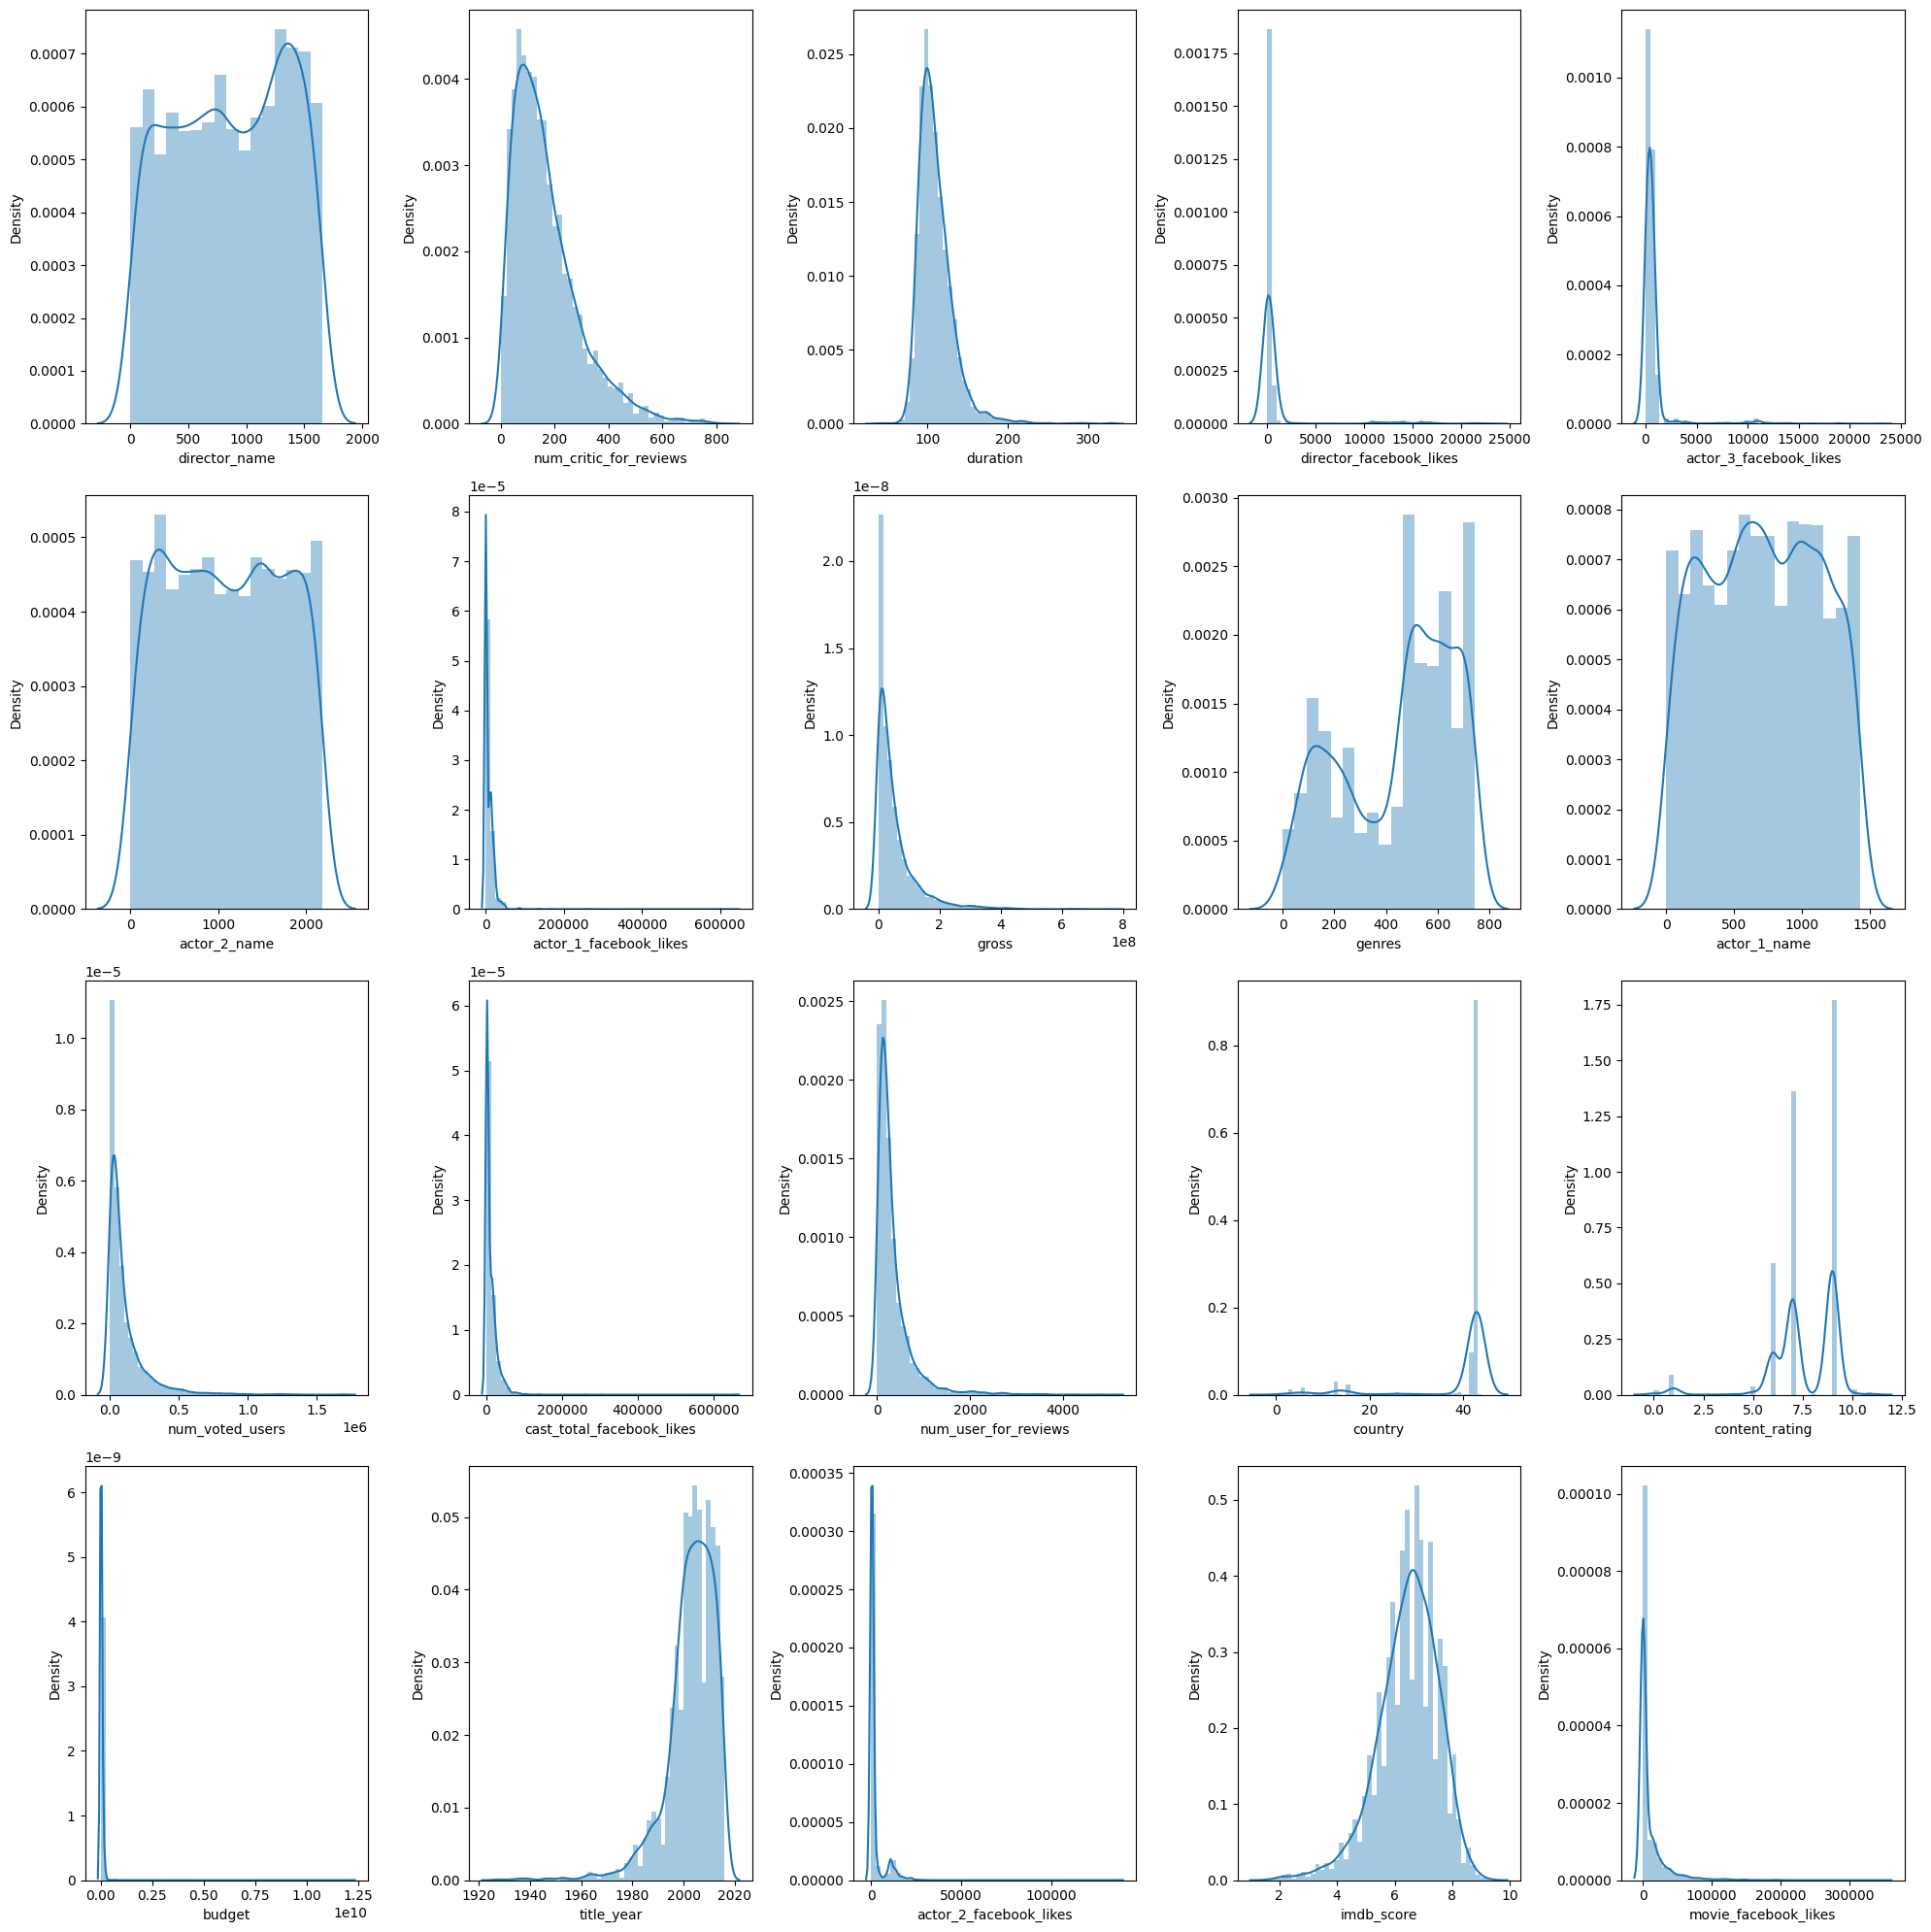

In [43]:

# The distribution plot shows us the overall distribution of the data.

rows=4
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=dataset.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(dataset[col[index]],ax=ax[i][j])
        index=index+1
plt.tight_layout()

In [ ]:

# Select only the numerical columns from the DataFrame

numerical_data = dataset.select_dtypes(include=['float64', 'int64'])

# Determine the number of rows and columns for the plot
num_rows, num_cols = numerical_data.shape
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

# Plot the histogram for each numerical column
for i, col in enumerate(numerical_data.columns):
    sns.histplot(numerical_data[col], ax=ax[i//num_cols, i%num_cols])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()


**Log Transformation**

In [46]:
# Selecting all features which are skewed and storing them i n the skewed_features

skewed_features=['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes']


In [47]:
# Applying log transformation on the skewed features    

for feature in skewed_features:
    dataset[feature]=np.log(dataset[feature]+1)


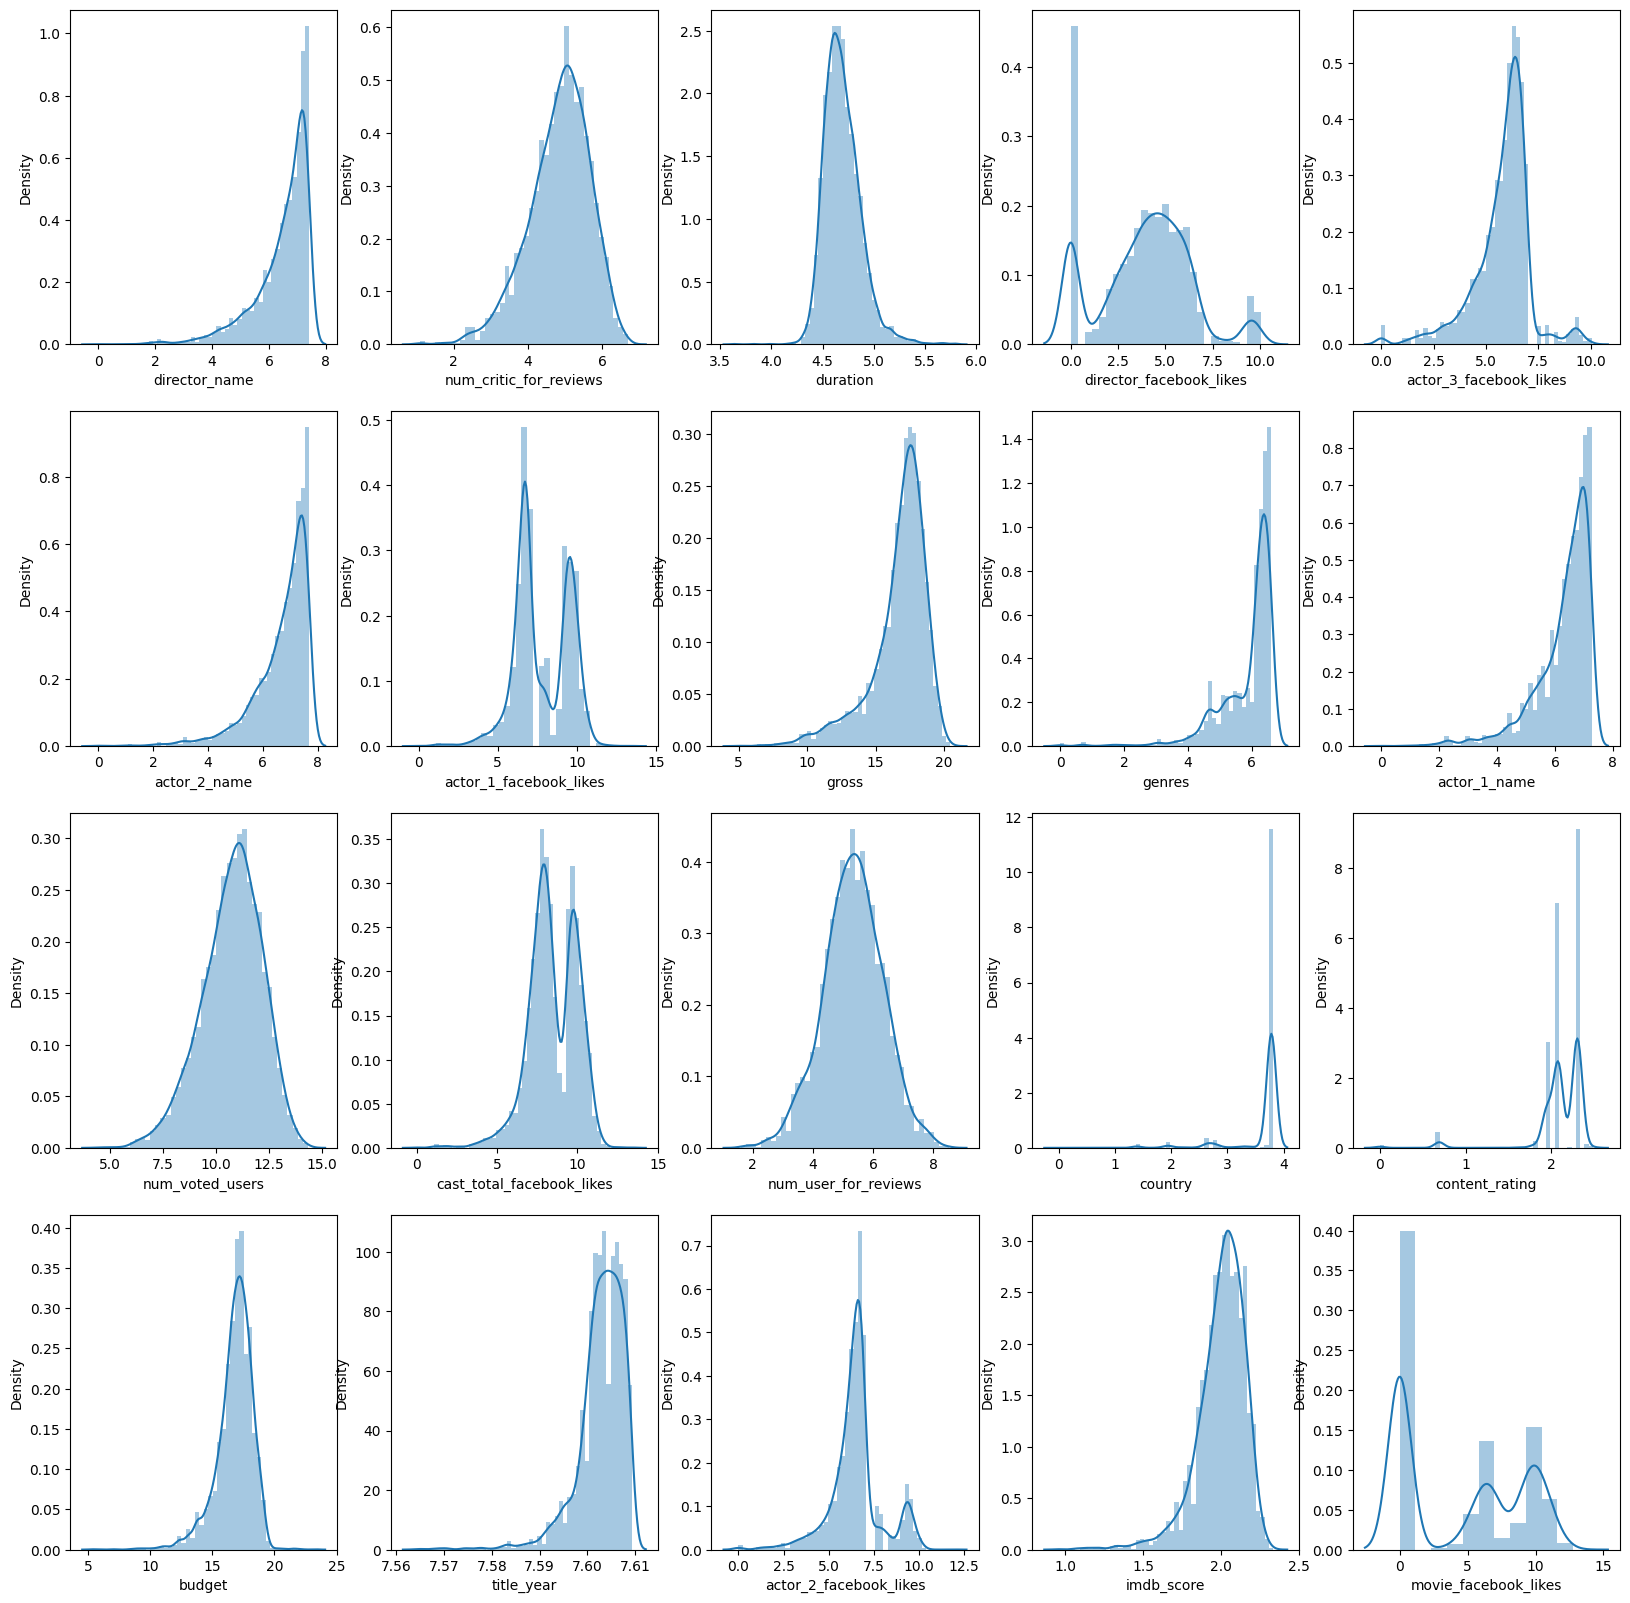

In [49]:
rows=4
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=dataset.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(dataset[col[index]],ax=ax[i][j])
        index=index+1
        
plt.show()
# Checking the changes in the distribution of data after applying log transformation.

**Splitting dataset**

In [50]:
# splitting data into dependent and independent variables

X=dataset.drop(labels=['imdb_score'],axis=1)
Y=dataset['imdb_score']
X.head()


director_name  num_critic_for_reviews  duration  director_facebook_likes  \
0       6.431331                6.584791  5.187386                 0.000000   
1       6.289716                5.713733  5.135798                 6.335054   
2       7.240650                6.401917  5.003946                 0.000000   
3       5.529429                6.701960  5.105945                 9.998843   
5       4.143135                6.137727  4.890349                 6.165418   

   actor_3_facebook_likes  actor_2_name  actor_1_facebook_likes      gross  \
0                6.752270      6.909753                6.908755  20.449494   
1                6.908755      7.372746               10.596660  19.550159   
2                5.087596      7.492760                9.305741  19.114199   
3               10.043293      5.942799               10.203629  19.920595   
5                6.274762      7.515889                6.463029  18.106774   

     genres  actor_1_name  num_voted_users  cast_total_facebook_likes  \
0  4.521789      5.247024        13.694704                   8.483636   
1  4.454347      6.532334        13.063082                  10.786242   
2  4.682131      5.556828        12.527681                   9.367430   
3  5.497168      7.200425        13.950337                  11.578339   
5  4.663439      5.777652        12.265308                   7.535830   

   num_user_for_reviews  country  content_rating     budget  title_year  \
0              8.024535  3.78419        2.079442  19.283571    7.605890   
1              7.122060  3.78419        2.079442  19.519293    7.604894   
2              6.902743  3.76120        2.079442  19.316769    7.608871   
3              7.901748  3.78419        2.079442  19.336971    7.607381   
5              6.605298  3.78419        2.079442  19.390323    7.607381   

   actor_2_facebook_likes  movie_facebook_likes  
0                6.842683             10.404293  
1                8.517393              0.000000  
2                5.976351             11.350418  
3               10.043293             12.007628  
5                6.450470             10.085851

In [51]:
# target column
Y.head()


0    2.186051
1    2.091864
2    2.054124
3    2.251292
5    2.028148
Name: imdb_score, dtype: float64

In [52]:
# Train_test_split
# Splitting data set into training and testing.

from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(3004, 19) (751, 19) (3004,) (751,)


**Machine Learning**

In [ ]:
#Linear Regression

In [54]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lm=LinearRegression()   
lm = lm.fit(X_train,Y_train)

#Traindata Predictions
train_pred = lm.predict(X_train)

#testdata predictions
test_pred = lm.predict(X_test)


RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_pred))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',lm.score(X_train, Y_train))
print('RSquared value on test:',lm.score(X_test, Y_test))

RMSE TrainingData =  0.1199935735876636
RMSE TestData =  0.12031121642892623
--------------------------------------------------
RSquared value on train: 0.41119002122665094
RSquared value on test: 0.38764887857535324


In [55]:
# Calculating errors for using error values in mean absolute percentage error

errors = abs(test_pred - Y_test)


In [56]:
# Calculate mean absolute percentage error (MAPE)

mape = 100 * (errors / Y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.43 %.


**Decision Tree Regressor**

In [57]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor


DT=DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,Y_train)

#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.08355550347624909
RMSE TestData =  0.1262015481456983
--------------------------------------------------
RSquared value on train: 0.7144978996704384
RSquared value on test: 0.3262207270259039


In [58]:
# Calculating errors for using error values in mean absolute percentage error

errors = abs(test_preds - Y_test)


In [60]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.45 %.


**Random Forest Regressor**

In [61]:
from sklearn.ensemble import RandomForestRegressor


RF=RandomForestRegressor().fit(X_train,Y_train)

#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.04132209495923672
RMSE TestData =  0.10088434584842758
--------------------------------------------------
RSquared value on train: 0.9301729251263526
RSquared value on test: 0.5694378525780197


In [62]:
# Calculating errors for using error values in mean absolute percentage error

errors = abs(test_preds1 - Y_test)

In [63]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.31 %.


**K-Nearest Neighbours**

In [64]:
from sklearn.neighbors import KNeighborsRegressor


knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)

#predicting train
train_preds2=knn.predict(X_train)
#predicting on test
test_preds2=knn.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds2)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds2)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',knn.score(X_train, Y_train))
print('RSquared value on test:',knn.score(X_test, Y_test))

RMSE TrainingData =  0.10862429686145442
RMSE TestData =  0.13247140608619523
--------------------------------------------------
RSquared value on train: 0.5174824177279325
RSquared value on test: 0.2576092125305033


In [35]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor

**Lasso Regression**

In [ ]:
lasso = LassoCV(cv=10).fit(X_train, Y_train)


#predicting train
train_preds3=lasso.predict(X_train)
#predicting on test
test_preds3=lasso.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds3)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds3)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',lasso.score(X_train, Y_train))
print('RSquared value on test:',lasso.score(X_test, Y_test))

**Ridge Regression**

In [ ]:
ridge = RidgeCV(cv=10).fit(X_train, Y_train)
#predicting train
train_preds4=ridge.predict(X_train)
#predicting on test
test_preds4=ridge.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds4)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds4)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',ridge.score(X_train, Y_train))
print('RSquared value on test:',ridge.score(X_test, Y_test))

**Elastic Net**

In [ ]:
elastic_net = ElasticNetCV(cv = 10).fit(X_train, Y_train)
#predicting train
train_preds5=elastic_net.predict(X_train)
#predicting on test
test_preds5=elastic_net.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds5)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds5)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',elastic_net.score(X_train, Y_train))
print('RSquared value on test:',elastic_net.score(X_test, Y_test))

**XG-Boost Regressor**

In [ ]:
xgbr =xgb.XGBRegressor().fit(X_train, Y_train)
#predicting train
train_preds6=xgbr.predict(X_train)
#predicting on test
test_preds6=xgbr.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds6)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds6)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',xgbr.score(X_train, Y_train))
print('RSquared value on test:',xgbr.score(X_test, Y_test))

In [ ]:
errors = abs(test_preds6 - Y_test)
# Calculating errors for using error values in mean absolute percentage error

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')